<a href="https://colab.research.google.com/github/rasathuraikaran/Machinelearning/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("Salary.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.shape

(35, 2)

In [7]:
data.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [12]:
#@title Missing value Detection
#lets check the count of the records in each column of the data set 
#if count of records < total cumber of records then there is a blank records
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [13]:
data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [14]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

<ipython-input-15-9a3330636fd5>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)


<AxesSubplot:>

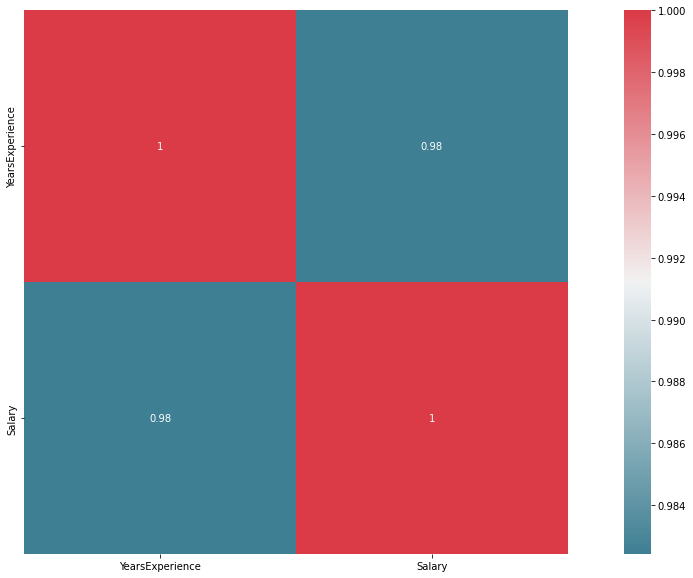

In [15]:
f,ax=plt.subplots(figsize=(20,10))
corr=data.corr("pearson")
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)

In [16]:
from sklearn.model_selection import train_test_split
x=data.drop('Salary',axis=1) 

In [17]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [20]:
y=data.Salary
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: Salary, dtype: int64

In [21]:
 x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
 x_train

,YearsExperience
15,4.9
7,3.2
22,7.9
4,2.2
14,4.5
32,12.3
1,1.3
6,3.0
28,10.3
2,1.5


In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()



In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(x_test)

In [27]:
y_test

29    121872
11     55794
20     91738
21     98273
10     63218
8      64445
34    139465
Name: Salary, dtype: int64

In [28]:
y_pred

array([120916.83125301,  63343.41236555,  88144.26973245,  90801.50445034,
        62457.66745959,  56257.45311786, 147489.17843183])

In [29]:
print(model.score(x_test,y_test))

0.9573976622819143
